<a href="https://colab.research.google.com/github/Rioba-Ian/Statistics/blob/main/Aquila_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

treat_one = ({'Treatment':[1,1,1,1,1,1,1,1,1,1,1,1],
    'Variety': [1,1,1,2,2,2,3,3,3,4,4,4],
         'height': [19,23.5,16,28,23,21.5,23.9,17.5,15,27,21,22.4]
             })
treat_two = ({'Treatment':[2,2,2,2,2,2,2,2,2,2,2,2],
        'Variety': [1,1,1,2,2,2,3,3,3,4,4,4],
         'height': [26.5,23,22.5,20.3,24,30,26.5,20,24.5,23,23,22.5]
             })
treat_three = ({'Treatment':[3,3,3,3,3,3,3,3,3,3,3,3],
        'Variety': [1,1,1,2,2,2,3,3,3,4,4,4],
         'height': [21.5,20,19.1,20.5,25,19,26,24,25,25,25,13]
             })

treat_one = pd.DataFrame(treat_one, columns= ['Treatment','Variety','height'])
treat_two = pd.DataFrame(treat_two, columns= ['Treatment','Variety','height'])
treat_three = pd.DataFrame(treat_three, columns= ['Treatment','Variety','height'])

treat_one_two= pd.merge(treat_one,treat_two,how='outer')
treat_one_two_three = pd.merge(treat_one_two,treat_three,how='outer')

red_soil =treat_one_two_three

print(red_soil)


    Treatment  Variety  height
0           1        1    19.0
1           1        1    23.5
2           1        1    16.0
3           1        2    28.0
4           1        2    23.0
5           1        2    21.5
6           1        3    23.9
7           1        3    17.5
8           1        3    15.0
9           1        4    27.0
10          1        4    21.0
11          1        4    22.4
12          2        1    26.5
13          2        1    23.0
14          2        1    22.5
15          2        2    20.3
16          2        2    24.0
17          2        2    30.0
18          2        3    26.5
19          2        3    20.0
20          2        3    24.5
21          2        4    23.0
22          2        4    23.0
23          2        4    22.5
24          3        1    21.5
25          3        1    20.0
26          3        1    19.1
27          3        2    20.5
28          3        2    25.0
29          3        2    19.0
30          3        3    26.0
31      

In [3]:
red_soil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Treatment  36 non-null     int64  
 1   Variety    36 non-null     int64  
 2   height     36 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.1 KB


In [4]:
red_soil.groupby('Variety').mean()

,Treatment,height
Variety,,
1,2,21.233333
2,2,23.477778
3,2,22.488889
4,2,22.433333


In [5]:
btreat_one = ({'Treatment':[1,1,1,1,1,1,1,1,1,1,1,1],
        'Variety': [1,1,1,2,2,2,3,3,3,4,4,4],
         'height': [18,17,20.9,23,26.5,21.5,19.9,20.5,30,20.1,21.4,21]
             })
btreat_two = ({'Treatment':[2,2,2,2,2,2,2,2,2,2,2,2],
        'Variety': [1,1,1,2,2,2,3,3,3,4,4,4],
         'height': [21,16,19.5,13,15,18,20.3,21,14,21,20,20]
             })
btreat_three = ({'Treatment':[3,3,3,3,3,3,3,3,3,3,3,3],
        'Variety': [1,1,1,2,2,2,3,3,3,4,4,4],
         'height': [23.5,22.4,23,22,21,20.5,20,19,18.5,21.3,21.1,22.5]
             })
btreat_one = pd.DataFrame(btreat_one, columns= ['Treatment','Variety','height'])
btreat_two = pd.DataFrame(btreat_two, columns= ['Treatment','Variety','height'])
btreat_three = pd.DataFrame(btreat_three, columns= ['Treatment','Variety','height'])

btreat_one_two= pd.merge(btreat_one,btreat_two,how='outer')
btreat_one_two_three = pd.merge(btreat_one_two,btreat_three,how='outer')

forest_soil = btreat_one_two_three

print(forest_soil)

    Treatment  Variety  height
0           1        1    18.0
1           1        1    17.0
2           1        1    20.9
3           1        2    23.0
4           1        2    26.5
5           1        2    21.5
6           1        3    19.9
7           1        3    20.5
8           1        3    30.0
9           1        4    20.1
10          1        4    21.4
11          1        4    21.0
12          2        1    21.0
13          2        1    16.0
14          2        1    19.5
15          2        2    13.0
16          2        2    15.0
17          2        2    18.0
18          2        3    20.3
19          2        3    21.0
20          2        3    14.0
21          2        4    21.0
22          2        4    20.0
23          2        4    20.0
24          3        1    23.5
25          3        1    22.4
26          3        1    23.0
27          3        2    22.0
28          3        2    21.0
29          3        2    20.5
30          3        3    20.0
31      

In [7]:
import statsmodels.api as sm
import statsmodels.stats.multicomp

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
from scipy import stats
# stats f_oneway functions takes the groups as input and returns F and P-value
F, p = stats.f_oneway(forest_soil['Variety'],forest_soil['height'])
print('F-Statistic=%.3f, p=%.3f' % (F, p))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


F-Statistic=1035.806, p=0.000


In [8]:
lm = ols('height ~ C(Treatment) + C(Variety) ',data=red_soil).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.8862
Date:                Thu, 12 Nov 2020   Prob (F-statistic):              0.503
Time:                        04:32:14   Log-Likelihood:                -94.600
No. Observations:                  36   AIC:                             201.2
Df Residuals:                      30   BIC:                             210.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            20.3083      1.498     13.557      0.000      17.249      23.368
C(Treatment)[T.2]     2.3333      1.498      1.558      0.130      -0.726       5.393
C(Treatment)[T.3]     0.4417      1.498      0.295      0.770      -2.618       3.501
C(Variety)[T.2]       2.2444      1.730      1.298      0.204      -1.288       5.777
C(Variety)[T.3]       1.2556      1.730      0.726      0.474      -2.277       4.788
C(Variety)[T.4]       1.2000      1.730      0.694      0.493      -2.333       4.733
==============================================================================
Omnibus:                        1.851   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                1.385
Skew:                          -0.479   Prob(JB):                        0.500
Kurtosis:                       2.932   Cond. No.                         5.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
table = sm.stats.anova_lm(lm)
print(table)

                df      sum_sq    mean_sq         F    PR(>F)
C(Treatment)   2.0   36.871667  18.435833  1.369293  0.269724
C(Variety)     3.0   22.783056   7.594352  0.564059  0.642928
Residual      30.0  403.912778  13.463759       NaN       NaN


<Figure size 1600x800 with 0 Axes>

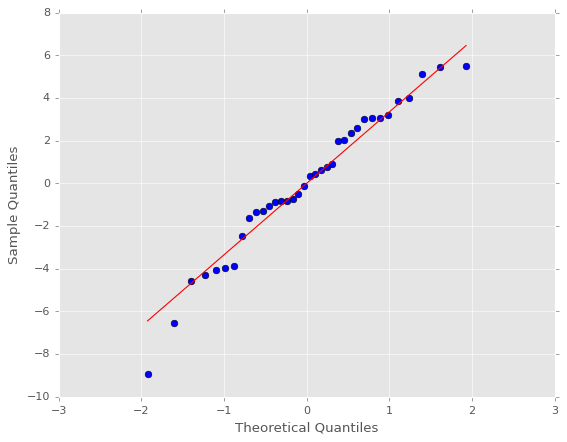

In [27]:
res_red = lm.resid
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(20,10))
fig = sm.qqplot(res_red, line = 's')
plt.show()

In [10]:
lm_forest = ols('height ~ C(Treatment) + C(Variety)',data=forest_soil).fit()
lm_forest.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     2.053
Date:                Thu, 12 Nov 2020   Prob (F-statistic):             0.0994
Time:                        04:33:02   Log-Likelihood:                -86.389
No. Observations:                  36   AIC:                             184.8
Df Residuals:                      30   BIC:                             194.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            21.4222      1.192     17.965      0.000      18.987      23.858
C(Treatment)[T.2]    -3.4167      1.192     -2.865      0.008      -5.852      -0.981
C(Treatment)[T.3]    -0.4167      1.192     -0.349      0.729      -2.852       2.019
C(Variety)[T.2]      -0.0889      1.377     -0.065      0.949      -2.901       2.723
C(Variety)[T.3]       0.2111      1.377      0.153      0.879      -2.601       3.023
C(Variety)[T.4]       0.7889      1.377      0.573      0.571      -2.023       3.601
==============================================================================
Omnibus:                        5.599   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                4.215
Skew:                           0.624   Prob(JB):                        0.122
Kurtosis:                       4.119   Cond. No.                         5.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
table = sm.stats.anova_lm(lm_forest)
print(table)

                df      sum_sq    mean_sq         F    PR(>F)
C(Treatment)   2.0   83.388889  41.694444  4.886874  0.014550
C(Variety)     3.0    4.205556   1.401852  0.164307  0.919563
Residual      30.0  255.957778   8.531926       NaN       NaN


<Figure size 2400x1600 with 0 Axes>

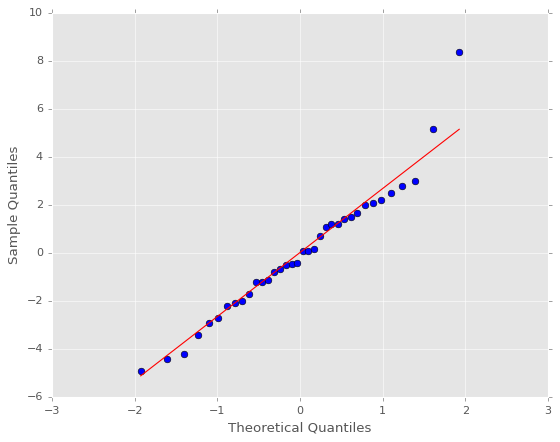

In [26]:
res_forest = lm_forest.resid
plt.style.use('ggplot')
plt.figure(figsize=(30,20))
fig = sm.qqplot(res_forest, line = 's')
plt.show()

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Aquila_ANOVA.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRe

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'